# ICM analysis

### Let's start from the ICM type

In [124]:
import numpy as np
import pandas as pd
import scipy.sparse as sps
import csv

import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

ICM_type = pd.read_csv("/kaggle/input/recommender-system-2022-challenge-polimi/data_ICM_type.csv")

mapped_id, original_id = pd.factorize(ICM_type["item_id"].unique())
item_original_Id_to_index = pd.Series(mapped_id, index=original_id)

print("Unique ItemID in the ICM type are {}".format(len(original_id)))

mapped_id, original_id = pd.factorize(ICM_type["feature_id"].unique())
feature_original_Id_to_index = pd.Series(mapped_id, index=original_id)

print("Unique FeatureID in the ICM type are {}".format(len(feature_original_Id_to_index)))

Unique ItemID in the ICM type are 23091
Unique FeatureID in the ICM type are 5


In [125]:
ICM_type

,item_id,feature_id,data
0,0,1,1
1,1,3,1
2,2,4,1
3,3,1,1
4,4,3,1
...,...,...,...
23086,27963,1,1
23087,27964,2,1
23088,27965,1,1
23089,27966,1,1


In [126]:
qts = []
for i in range(5):
    qts.append(len(ICM_type[ICM_type['feature_id'] == i]))
    
qts

[0, 9983, 1294, 4567, 7242]

<AxesSubplot:>

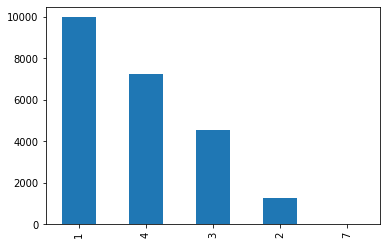

In [127]:
pd.value_counts(ICM_type['feature_id']).plot.bar()

### What about the ICM length?

In [128]:
ICM_length = pd.read_csv("/kaggle/input/recommender-system-2022-challenge-polimi/data_ICM_length.csv")

mapped_id, original_id = pd.factorize(ICM_length["item_id"].unique())
item_original_Id_to_index = pd.Series(mapped_id, index=original_id)

print("Unique ItemID in the ICM length are {}".format(len(original_id)))

mapped_id, original_id = pd.factorize(ICM_length["feature_id"].unique())
feature_original_Id_to_index = pd.Series(mapped_id, index=original_id)

print("Unique FeatureID in the ICM length are {}".format(len(feature_original_Id_to_index)))

Unique ItemID in the ICM length are 23091
Unique FeatureID in the ICM length are 1


In [129]:
ICM_length

,item_id,feature_id,data
0,0,0,1
1,1,0,1
2,2,0,21
3,3,0,1
4,4,0,1
...,...,...,...
23086,27963,0,1
23087,27964,0,1
23088,27965,0,1
23089,27966,0,1


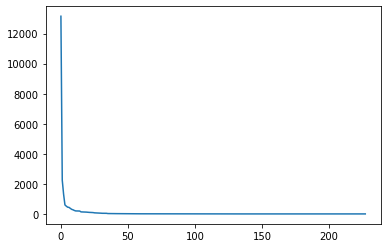

In [123]:
pyplot.plot(pd.value_counts(ICM_length['data']).values)

## What if we merge them?

In [134]:
ICM_all = pd.concat([ICM_type, ICM_length]).sort_values(by='item_id')
ICM_all

,item_id,feature_id,data
0,0,1,1
0,0,0,1
1,1,0,1
1,1,3,1
2,2,4,1
...,...,...,...
23088,27965,1,1
23089,27966,0,1
23089,27966,1,1
23090,27967,4,1


In [135]:
mapped_id, original_id = pd.factorize(ICM_all["item_id"].unique())
item_original_Id_to_index = pd.Series(mapped_id, index=original_id)

print("Unique ItemID in the merged ICM are {}".format(len(original_id)))

mapped_id, original_id = pd.factorize(ICM_all["feature_id"].unique())
feature_original_Id_to_index = pd.Series(mapped_id, index=original_id)

print("Unique FeatureID in the merged ICM are {}".format(len(feature_original_Id_to_index)))

ICM_all["item_id"] = ICM_all["item_id"].map(item_original_Id_to_index)
ICM_all["feature_id"] = ICM_all["feature_id"].map(feature_original_Id_to_index)

Unique ItemID in the merged ICM are 23091
Unique FeatureID in the merged ICM are 6


In [136]:
ICM_all.drop_duplicates()

,item_id,feature_id,data
0,0,0,1
0,0,1,1
1,1,1,1
1,1,2,1
2,2,3,1
...,...,...,...
23088,23088,0,1
23089,23089,1,1
23089,23089,0,1
23090,23090,3,1


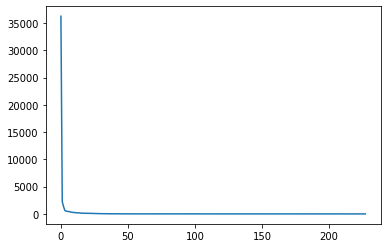

In [140]:
pyplot.plot(pd.value_counts(ICM_all['data']).values)